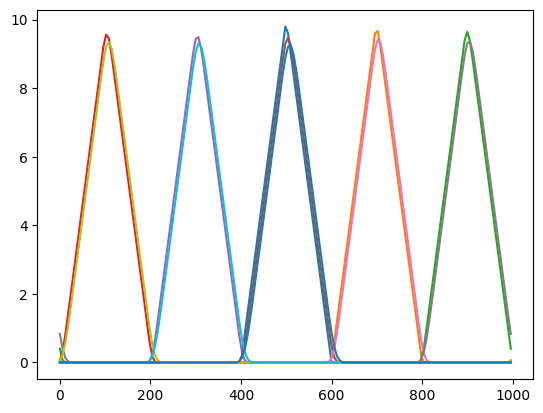

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# function
def funcAdvec(x):
    y = np.zeros(len(x))
    for i in range(0, len(x)):
        if x[i] < 400 or x[i] > 600:
            y[i] = 0
        elif(x[i] < 500):
            y[i] = 0.1*(x[i] - 400)
        else:
            y[i] = 20 - 0.1*(x[i] - 400)
    return y

u = 200
dt = 1.0
dx = 6
x0 = np.arange(0, 1000, dx)
y0 = funcAdvec(x0)
xmax = max(x0)
sz = len(x0)
y1 = np.zeros(sz)
tpoint = 1000
t = 0
plt.plot(x0, y0)

for j in range (10):
    for i in range(sz):
        xjd = x0[i] - u*dt
        if xjd < 0:
            xjd = xjd + max(x0)
        # find k so that x[k] < xjd < x[k+1]
        k = int(np.floor(xjd/dx))
        #interpolate to have yjd
        a = (xjd - x0[k])/dx
        yjd = (1-a) * y0[k] + a * y0[k + 1]
        y1[i] = yjd
    y0 = y1.copy()

    plt.plot(x0, y0)




In [ ]:
plt.plot(x0,y0)

$$ \phi(x_j, t_{n+1}) = \phi(x_j - u\Delta t, t_n) $$
$$ \phi(x_j, t_{n+1}) = \phi(x_{jd}, t_n) $$
$$ x_{jd} = x_j - u\Delta t $$


In [ ]:
a = 1; c = 3
c = 0.3
(1-0.3) * a + 0.3*3